In [315]:
import pandas as pd

df = pd.read_csv('Data/overall-state-smoothed.csv')
print('how many data points:',len(df))
pd.set_option('display.max_columns', None)
df = df[['date','state_code','summed_n','smoothed_pct_cli','smoothed_pct_tested_and_positive','smoothed_pct_cli_anosmia_ageusia','smoothed_pct_contact_covid_positive']]
df['date']= pd.to_datetime(df['date']) 
df.head(15)

how many data points: 96839


,date,state_code,summed_n,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-09-16,ak,113,1.7699,NaN,4.4248,2.6549
1,2020-09-15,ak,126,1.5873,NaN,3.9683,1.5873
2,2020-09-14,ak,130,1.5385,NaN,3.8462,1.5385
3,2020-09-13,ak,126,1.6534,NaN,4.1005,1.5873
4,2020-09-12,ak,125,0.8667,NaN,3.3333,2.4000
5,2020-09-11,ak,123,0.8808,NaN,3.3875,3.2520
6,2020-09-10,ak,116,0.9339,NaN,3.5920,3.4483
7,2020-09-09,ak,112,0.9673,NaN,1.9345,3.5714
8,2020-09-08,ak,105,1.0317,NaN,3.9683,4.7619
9,2020-09-07,ak,113,0.9587,6.2340,3.6873,7.1818


In [316]:
df_NY = df.loc[df['state_code'] == 'ny']
df_NY = df_NY.sort_values(by=['date'])
# df_NY['date']= pd.to_datetime(df_NY['date'])
# df_NY = df_NY.loc[df_NY['date'] > '2020-07-01']
df_NY = df_NY.groupby(['date']).mean()
df_NY = df_NY.reset_index(drop=False)
df_NY.head(16)

,date,summed_n,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-04-12,6500.000000,1.483558,1.831508,4.314217,2.904950
1,2020-04-13,6596.666667,1.427975,1.892350,4.068408,2.870875
2,2020-04-14,6355.666667,1.216125,1.902758,3.823442,2.929308
3,2020-04-15,5612.666667,1.068767,1.843942,3.319983,2.977175
4,2020-04-16,5288.666667,0.933033,1.951092,3.043292,2.837883
5,2020-04-17,5219.000000,0.889358,1.904175,2.890517,2.802558
6,2020-04-18,5787.666667,0.825675,1.889600,2.730675,2.716967
7,2020-04-19,6605.666667,0.821792,1.955558,2.676483,2.659442
8,2020-04-20,6784.000000,0.844250,1.850167,2.693408,2.692233
9,2020-04-21,6216.666667,0.852367,1.668750,2.508842,2.693175


In [321]:
import numpy as np
R0_est = []
pop_NY = 18804000 #this population is assumed not to change much, but what was NYC pop change during th etime period
R_days = []
infected_days = 14 #how many days can a person be part of the currently infected community
for i in range(0,len(df_NY)-infected_days):#used pct_pos here not cli
    num_cli_t = pop_NY*df_NY.loc[i, 'smoothed_pct_tested_and_positive']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_NY-num_cli_t)*df_NY.loc[i+infected_days,'smoothed_pct_tested_and_positive']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est.append(Ave)
    pop_NY = pop_NY-num_cli_t_plus
        
last_val_known = R0_est[-1]
for i in range(infected_days+1):
    R0_est.append(last_val_known)
print(len(df_NY),len(R0_est))
df_NY.insert(2, "R0_est_pct_pos", R0_est, True)

pop_NY = 18804000
R_days = []
R0_est2 = []
for i in range(0,len(df_NY)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_NY*df_NY.loc[i, 'smoothed_pct_cli_anosmia_ageusia']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_NY-num_cli_t)*df_NY.loc[i+infected_days,'smoothed_pct_cli_anosmia_ageusia']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_NY = pop_NY-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_NY),len(R0_est2))

df_NY.insert(2, "R0_est_pct_cli_aa", R0_est2, True)
df_NY.head(3)

158 158
158 158


,date,summed_n,R0_est_pct_cli_aa,R0_est_pct_pos,R0_est_pct_pos,R0_est_pct_pos,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-04-12,6500.000000,0.501224,0.776849,0.776849,0.776849,1.483558,1.831508,4.314217,2.904950
1,2020-04-13,6596.666667,0.493258,0.765171,0.765171,0.765171,1.427975,1.892350,4.068408,2.870875
2,2020-04-14,6355.666667,0.519670,0.811420,0.811420,0.811420,1.216125,1.902758,3.823442,2.929308


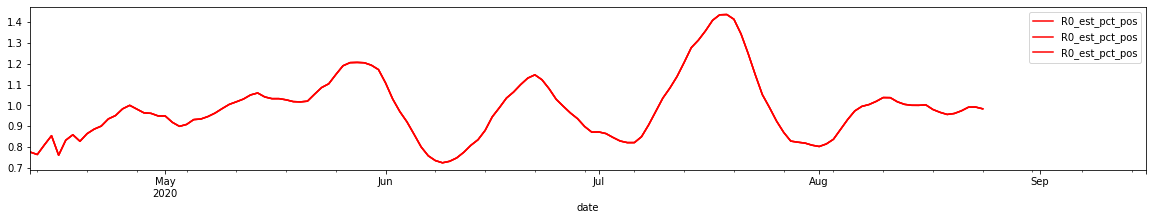

In [322]:
import matplotlib.pyplot as plt
df_NY.plot(kind='line',x='date',y='R0_est_pct_pos',color='red')
#df.plot(figsize=(7,5))
plt.show()

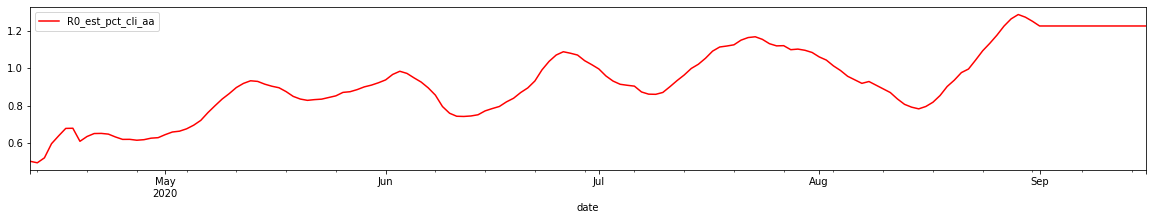

In [323]:
import matplotlib.pyplot as plt
df_NY.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='red')
#df.plot(figsize=(7,5))
plt.show()

In [324]:
import pandas as pd

df_NewY2 = pd.read_csv("Data/NY_covid.csv", sep="/")
df_NewY = df_NewY2[['date','R']]
df_NewY['date']= pd.to_datetime(df_NewY['date'])
df_NewY = df_NewY.loc[df_NewY['date'] > '2020-04-12']
df_NewYork =  pd.merge(df_NY, df_NewY, on='date')
df_NewY2.head(3)

C:\Users\EPCOT\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,new_inf,total_inf,Hosp,0_ded,total_ded,R,IFR
1,2020-02-16,"1,158","1,158",0,0.0,0.0,3.862,1.25%
2,2020-02-17,"1,158","2,316",0,0.0,0.0,3.862,1.25%
3,2020-02-18,"1,158","3,474",0,0.0,0.0,3.862,1.25%


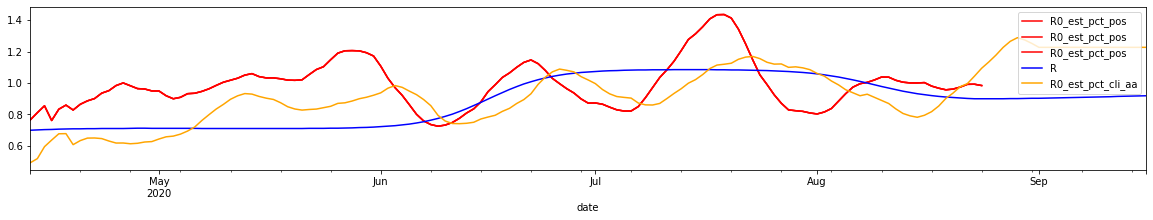

In [325]:
import matplotlib.pyplot as plt
ax = df_NewYork.plot(kind='line',x='date',y='R0_est_pct_pos',color='red')
df_NewYork.plot(kind='line',x='date',y='R',color='blue',ax=ax)
df_NewYork.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='orange',ax=ax)
#df.plot(figsize=(7,5))
plt.show()